## Importing necessary libraries

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.multioutput import MultiOutputClassifier

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline

data = pd.read_csv('kolam_dataset_multilabels.csv')
inputs = data['input']


## Inputs and labels info

In [35]:
inputs

0                               a
1                               b
2                               c
3                               d
4                              ab
                  ...            
155                  dbac c cd dc
156          dbac c c cab b b bac
157          dca a a acdb b b bdc
158    bacd d dbac c cd d d d dba
159           dbac c cd d d d dba
Name: input, Length: 160, dtype: object

In [36]:
labels = data.drop(['input'], axis =1)
labels

,a,b,c,d
0,1,1,1,0
1,1,1,0,1
2,1,0,1,1
3,0,1,1,1
4,0,1,0,0
...,...,...,...,...
155,1,0,1,0
156,0,0,1,1
157,1,0,1,0
158,1,0,1,0


## Labels Distribution to know whether the dataset is balanced or not

In [4]:
# Label Distribution
label_distribution = labels.sum() / len(labels)
print("Label Distribution:")
print(label_distribution)

# Label Counts
label_counts = labels.sum(axis=1).value_counts()
print("\nLabel Counts:")
print(label_counts)

# Class Ratios
class_ratios = labels.mean()
print("\nClass Ratios:")
print(class_ratios)

Label Distribution:
a    0.51875
b    0.56250
c    0.53125
d    0.54375
dtype: float64

Label Counts:
2    63
3    61
1    36
Name: count, dtype: int64

Class Ratios:
a    0.51875
b    0.56250
c    0.53125
d    0.54375
dtype: float64


## Conversion of inputs to TF-IDF vectors to convert Kolam shapes into float values to apply algorithms

In [44]:
# Convert text data to TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b")
X = tfidf_vectorizer.fit_transform(inputs)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42, stratify = labels)




## Data distribution of inputs

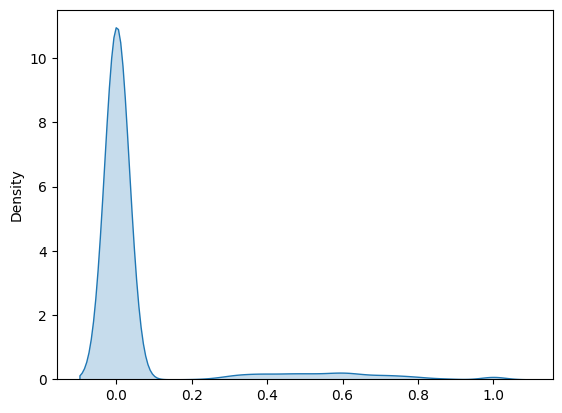

In [6]:
sns.kdeplot(data = X.toarray().flatten(), fill = True)
plt.show()

## Implementing Random Forest Classifier

In [7]:

# Define and train the classifier
classifier_RF = MultiOutputClassifier(RandomForestClassifier())
classifier_RF.fit(X_train, y_train)

# Predict labels for test data
y_pred_RF = classifier_RF.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred_RF)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_RF))

Accuracy: 0.4375
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81        17
           1       0.68      0.72      0.70        18
           2       0.73      0.65      0.69        17
           3       0.82      0.82      0.82        17

   micro avg       0.75      0.77      0.76        69
   macro avg       0.75      0.77      0.76        69
weighted avg       0.75      0.77      0.76        69
 samples avg       0.78      0.73      0.72        69



In [8]:
classifier_RF.get_params()

{'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'sqrt',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__monotonic_cst': None,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(),
 'n_jobs': None}

## Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

# Initialize and train logistic regression model
logistic_regression_model = MultiOutputClassifier(LogisticRegression())
logistic_regression_model.fit(X_train, y_train)

# Predict labels for test data
y_pred_log = logistic_regression_model.predict(X_test)


# Evaluate the model
logistic_regression_accuracy = logistic_regression_model.score(X_test, y_test)
print("Logistic Regression Accuracy:", logistic_regression_accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.40625
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86        17
           1       0.65      0.83      0.73        18
           2       0.71      0.59      0.65        17
           3       0.83      0.88      0.86        17

   micro avg       0.75      0.81      0.78        69
   macro avg       0.75      0.81      0.77        69
weighted avg       0.75      0.81      0.77        69
 samples avg       0.73      0.79      0.73        69



C:\Users\efm-workstation\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## SVM

In [10]:
from sklearn.svm import SVC

# Initialize and train SVM model
svm_model = MultiOutputClassifier(SVC())
svm_model.fit(X_train, y_train)

# Predict labels for test data
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
svm_accuracy = svm_model.score(X_test, y_test)
print("SVM Accuracy:", svm_accuracy)


# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.34375
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81        17
           1       0.67      0.78      0.72        18
           2       0.71      0.59      0.65        17
           3       0.83      0.88      0.86        17

   micro avg       0.74      0.78      0.76        69
   macro avg       0.74      0.78      0.76        69
weighted avg       0.74      0.78      0.76        69
 samples avg       0.76      0.77      0.72        69



## KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train KNN model
knn_model = MultiOutputClassifier(KNeighborsClassifier())
knn_model.fit(X_train, y_train)

# Predict labels for test data
y_pred_knn = knn_model.predict(X_test)


# Evaluate the model
knn_accuracy = knn_model.score(X_test, y_test)
print("KNN Accuracy:", knn_accuracy)


# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.3125
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.71      0.67        17
           1       0.61      0.78      0.68        18
           2       0.70      0.41      0.52        17
           3       0.68      0.88      0.77        17

   micro avg       0.65      0.70      0.67        69
   macro avg       0.66      0.69      0.66        69
weighted avg       0.65      0.70      0.66        69
 samples avg       0.64      0.67      0.62        69



C:\Users\efm-workstation\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## GBM

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train GBM model
gbm_model = MultiOutputClassifier(GradientBoostingClassifier())
gbm_model.fit(X_train, y_train)


# Predict labels for test data
y_pred_gbm = gbm_model.predict(X_test)

# Evaluate the model
gbm_accuracy = gbm_model.score(X_test, y_test)
print("GBM Accuracy:", gbm_accuracy)


# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_gbm))

GBM Accuracy: 0.625
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86        17
           1       0.70      0.89      0.78        18
           2       0.81      0.76      0.79        17
           3       0.85      1.00      0.92        17

   micro avg       0.78      0.90      0.84        69
   macro avg       0.79      0.90      0.84        69
weighted avg       0.79      0.90      0.84        69
 samples avg       0.79      0.87      0.80        69



In [51]:
gbm_model.get_params()

{'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'friedman_mse',
 'estimator__init': None,
 'estimator__learning_rate': 0.1,
 'estimator__loss': 'log_loss',
 'estimator__max_depth': 3,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_iter_no_change': None,
 'estimator__random_state': None,
 'estimator__subsample': 1.0,
 'estimator__tol': 0.0001,
 'estimator__validation_fraction': 0.1,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': GradientBoostingClassifier(),
 'n_jobs': None}

## Applying GridSearchCV for applying cross validation and implementing the random forest classifier again

In [15]:
pipeline = Pipeline([
    ('clf', RandomForestClassifier())
])

# Define parameter grid for GridSearchCV
param_grid = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Perform GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.53125
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        17
           1       0.67      0.89      0.76        18
           2       0.69      0.53      0.60        17
           3       0.79      0.88      0.83        17

   micro avg       0.75      0.81      0.78        69
   macro avg       0.75      0.81      0.77        69
weighted avg       0.75      0.81      0.77        69
 samples avg       0.73      0.76      0.72        69



## Balancing the dataset by randomly removing instances where there are more number of 2 labels and 3 labels than 1 label to make them equal in count

In [ ]:
import pandas as pd



# Number of instances to drop for each label combination
num_instances_to_drop = 30

# Get the indices of instances with two labels and three labels
indices_two_labels = labels[(labels.sum(axis=1) == 2)].sample(num_instances_to_drop).index
indices_three_labels = labels[(labels.sum(axis=1) == 3)].sample(num_instances_to_drop).index

# Drop instances from the DataFrame
data_balanced = data.drop(indices_two_labels.union(indices_three_labels))
labels_balanced = labels.drop(indices_two_labels.union(indices_three_labels))

# Check the new label distribution
print(labels_balanced.sum(axis=0))


# Label Counts
label_balanced_counts = labels_balanced.sum(axis=1).value_counts()
print("\nLabel Counts:")
print(label_balanced_counts)

## Balanced data

In [ ]:
data_balanced

## Balanced inputs and labels

In [ ]:
balanced_inputs = data_balanced['input']
balanced_labels = data_balanced.drop(['input'], axis = 1)


In [ ]:
balanced_inputs

In [ ]:
balanced_labels

## Applying TF-IDF on balanced data and splitting into train and test sets

In [ ]:
# Convert text data to TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b")
X_balanced = tfidf_vectorizer.fit_transform(balanced_inputs)

# Split data into train and test sets
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, balanced_labels, 
                                                                                        test_size=0.2, random_state=42, stratify = balanced_labels)

## Implementing Random Forest Classifier on the dropped and balanced dataset

In [ ]:
# Define and train the classifier
classifier = MultiOutputClassifier(RandomForestClassifier())
classifier.fit(X_train_balanced, y_train_balanced)

# Predict labels for test data
y_pred_balanced = classifier.predict(X_test_balanced)

# Evaluate performance
accuracy_balanced = accuracy_score(y_test_balanced, y_pred_balanced)
print("Accuracy:", accuracy_balanced)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_balanced, y_pred_balanced))

#### Accuracy dropped to 35% due to loss of datapoints from the dataset even though dataset is balanced

In [ ]:
pipeline = Pipeline([
    ('clf', RandomForestClassifier())
])

# Define parameter grid for GridSearchCV
param_grid = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Perform GridSearchCV
grid_search.fit(X_train_balanced, y_train_balanced)

# Get the best parameters
best_params = grid_search.best_params_

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_balanced)

# Evaluate performance
accuracy = accuracy_score(y_test_balanced, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_balanced, y_pred))

#### After GridSearchCV also, accuracy dropped to 35% due to loss of datapoints from the dataset even though dataset is balanced

## Predicting labels on the GBM model with 56% accuracy

In [21]:
X_new = ['dbac bd']
X_new_transf = tfidf_vectorizer.transform(X_new)

y_new_pred = gbm_model.predict(X_new_transf)
y_new_pred

array([[0, 0, 1, 1]], dtype=int64)

## Predicting probabilities for all labels and their classes

In [22]:
# Predict probabilities for each class
y_pred_proba = gbm_model.predict_proba(X_new_transf)
y_pred_proba

[array([[0.86270158, 0.13729842]]),
 array([[0.85515113, 0.14484887]]),
 array([[0.42966245, 0.57033755]]),
 array([[0.07876098, 0.92123902]])]